In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools

In [5]:
def read_dimacs_cnf(filename):
    clauses = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("c"):
                continue
            if line.startswith("p cnf"):
                num_vars, num_clauses = map(int, line.strip().split()[2:])
            else:
                clause = list(map(int, line.strip().split()[:-1]))
                clauses.append(clause)
    return num_vars, clauses

def draw_hypergraph(num_vars, clauses):
    G = nx.Graph()

    for var in range(1, num_vars + 1):
        G.add_node(var)

    for i, clause in enumerate(clauses):
        G.add_nodes_from(clause)
        for pair in itertools.combinations(clause, 2):
            G.add_edge(*pair, clause=i+1)

    node_colors = []
    for node in G.nodes():
        color = 0
        for i, clause in enumerate(clauses):
            if node in clause:
                color = i + 1
                break
        node_colors.append(color)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_color=node_colors, cmap=plt.cm.Blues, node_size=800)

    fig, ax = plt.subplots()
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues)
    sm.set_array([])
    plt.colorbar(sm, ticks=range(1, len(clauses) + 1), label='Clause', ax=ax)

    plt.show()

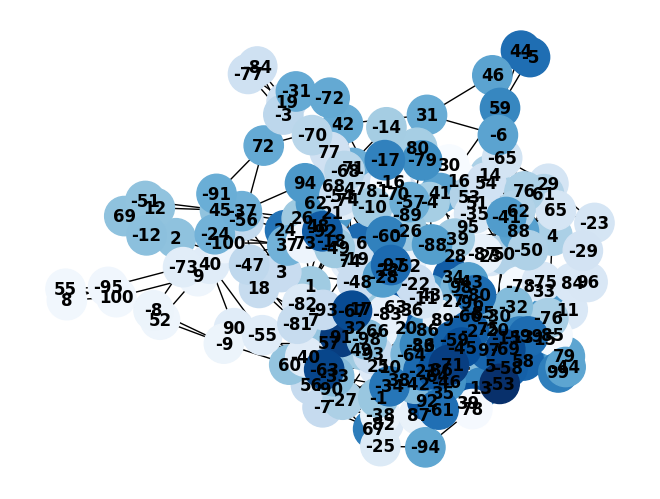

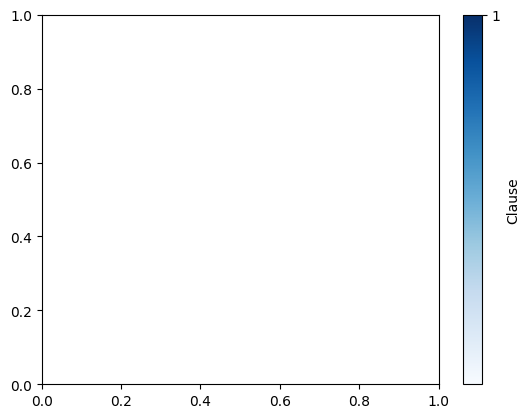

In [6]:
filename = "DIMACS_files/turbo_easy/example_2.cnf"
num_vars, clauses = read_dimacs_cnf(filename)
draw_hypergraph(num_vars, clauses)